In [72]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats.mstats import winsorize
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [73]:
%pip install ucimlrepo

In [74]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets



In [75]:
dataSet = pd.DataFrame(X) #create a data frame
dataSet["income"] = y
dataSet

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [76]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [77]:
for col in dataSet.columns:
  uniqueData=dataSet[col].unique()
  print("Uniqe data of " f"{col} ")
  print(uniqueData)
  print('\n')

Uniqe data of age 
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]


Uniqe data of workclass 
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]


Uniqe data of fnlwgt 
[ 77516  83311 215646 ... 173449  89686 350977]


Uniqe data of education 
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


Uniqe data of education-num 
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


Uniqe data of marital-status 
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


Uniqe data of occupation 
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Othe

In [78]:
dataSet.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


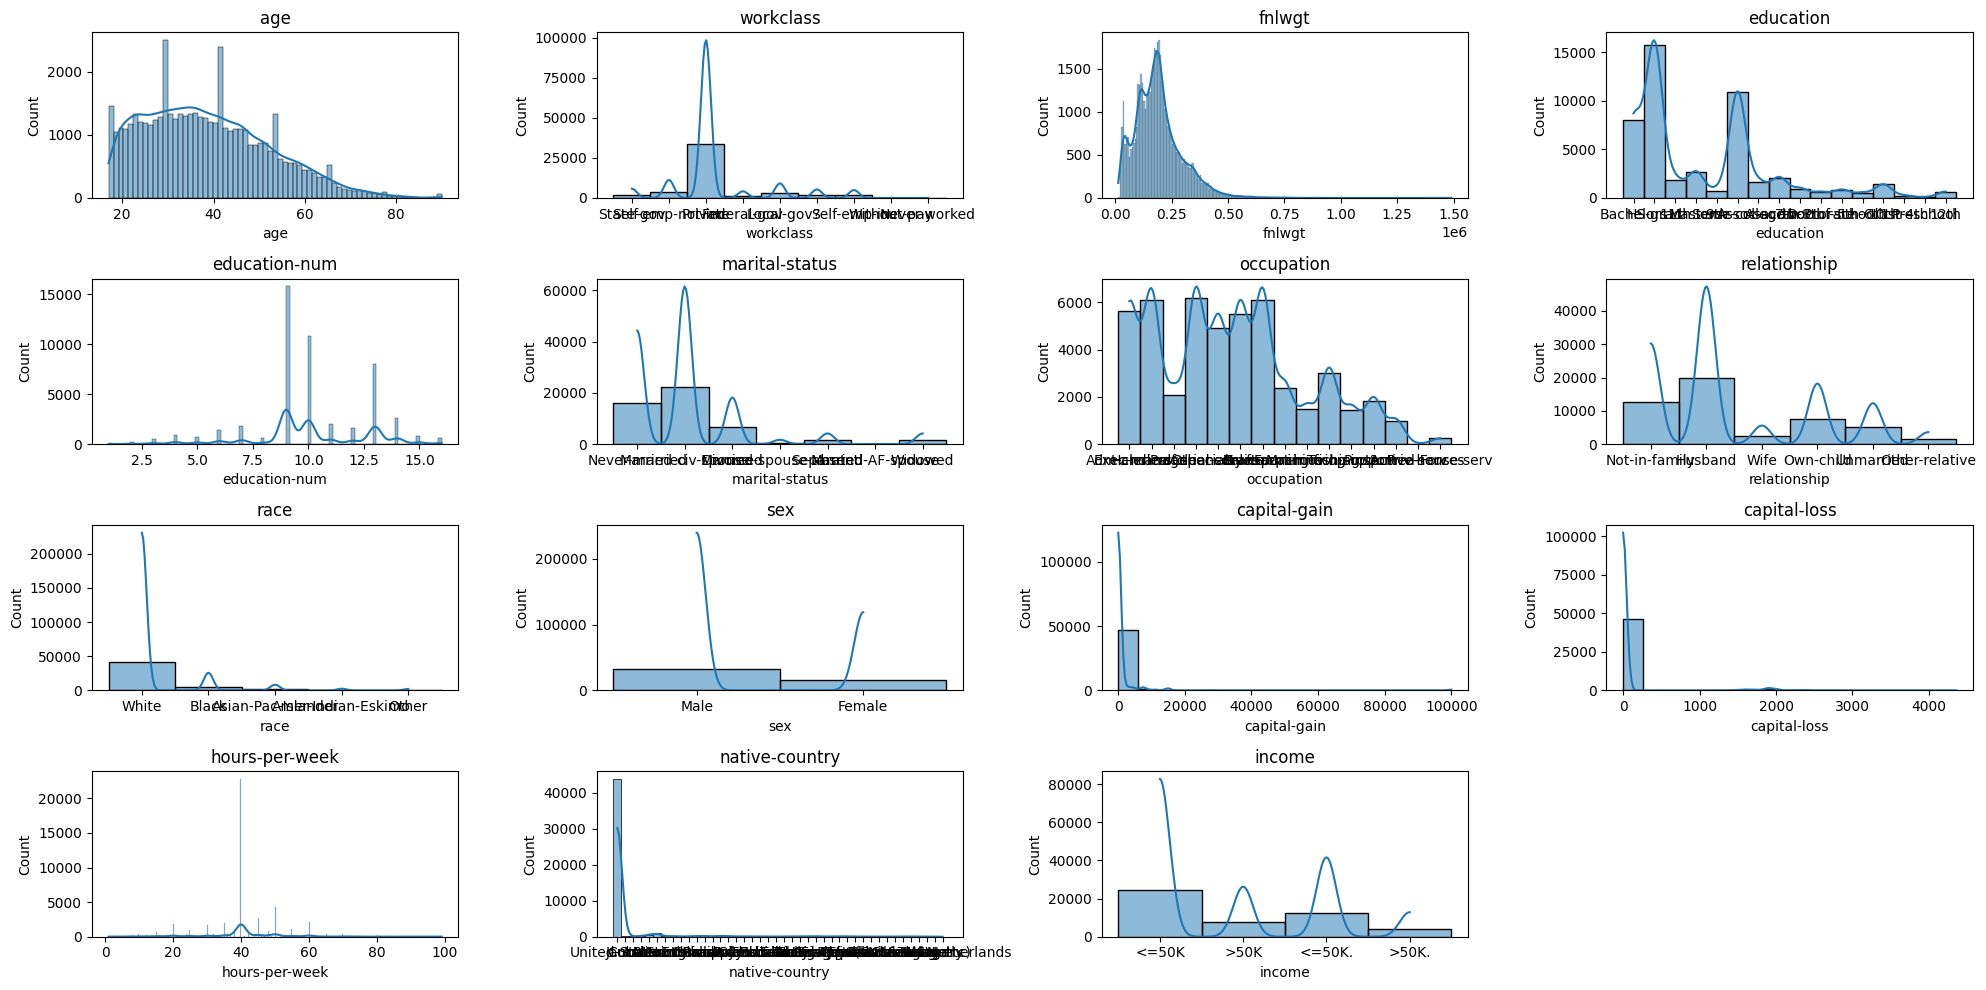

In [79]:
# Ploting distribution of each topics

import matplotlib.pyplot as plt
import seaborn as sb


plt.figure(figsize=(20, 10))
for i, col in enumerate(dataSet.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(dataSet[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

**Data Preprocessing**




1.  Remove Null Values



In [80]:
dataSet.isnull()  #Searching the Null Values

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [81]:
dataSet.isnull().sum()  #Get the total of null values

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [82]:
# Droping null value rows
dataSet.dropna(inplace=True)

In [83]:
dataSet.isnull().sum()  #checaking the total of null values after preprocess

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


2.   Remove unnecessary symbols



In [84]:
dataSet.isin(["?"]).sum(axis=0)  #searching is there is any data included with "?" this symbol

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [85]:
for col in ['workclass', 'occupation', 'native-country']:    #replacing "?" with nun vales
    dataSet.loc[dataSet[col] == '?', col] = np.nan

In [86]:
dataSet.isin(["?"]).sum(axis=0)   #searching is there is any data included with "?" this symbol after cleaning

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [87]:
def remove_punctuations(text):
    text = text.replace('.', '')
    return text

dataSet['income'] = dataSet['income'].apply(remove_punctuations)



3.   Removing unnecessary columns



In [88]:
dataSet

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [89]:
dataSet = dataSet.drop(['education'], axis=1)  #removing education colum beacuse "education" & "education-num" colums gives the same detail so we keep the numaric colum

In [90]:
dataSet     #cheacking data set after droping the  education part

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
48837,39,Private,215419,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48839,38,Private,374983,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


4. Removing Duplicate values

In [91]:
dataSet = dataSet.drop_duplicates()

Removing Outliers

Text(0, 0.5, 'Count')

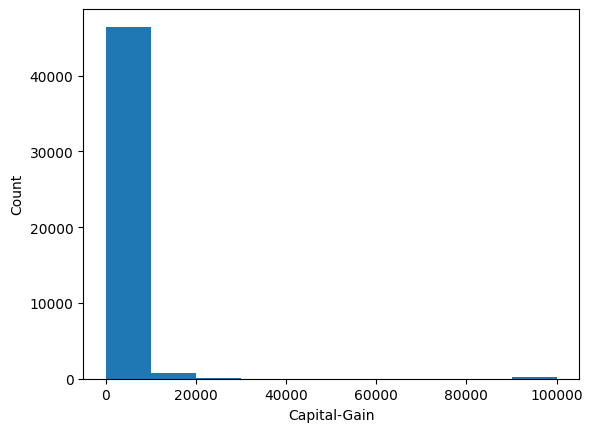

In [92]:
plt.hist(dataSet["capital-gain"])   #getting a histogram of capital-gain X as values and Y as counts of that.
plt.xlabel("Capital-Gain")
plt.ylabel("Count")

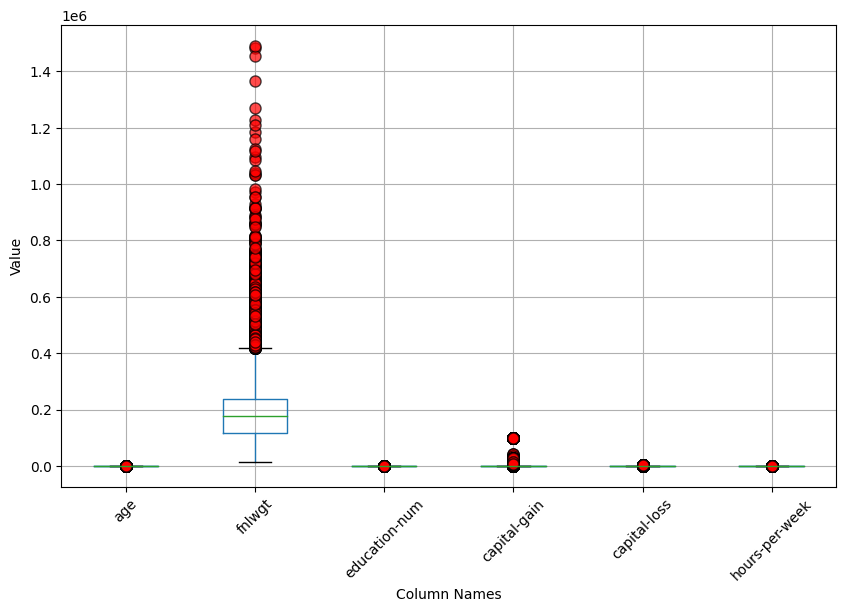

In [93]:
#Selecting numerical column names for boxplot visualization
numerical_column_names = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

plt.figure(figsize=(10, 6))
dataSet[numerical_column_names].boxplot(flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none',alpha=0.7 ))

plt.xlabel('Column Names')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

Winsorization part

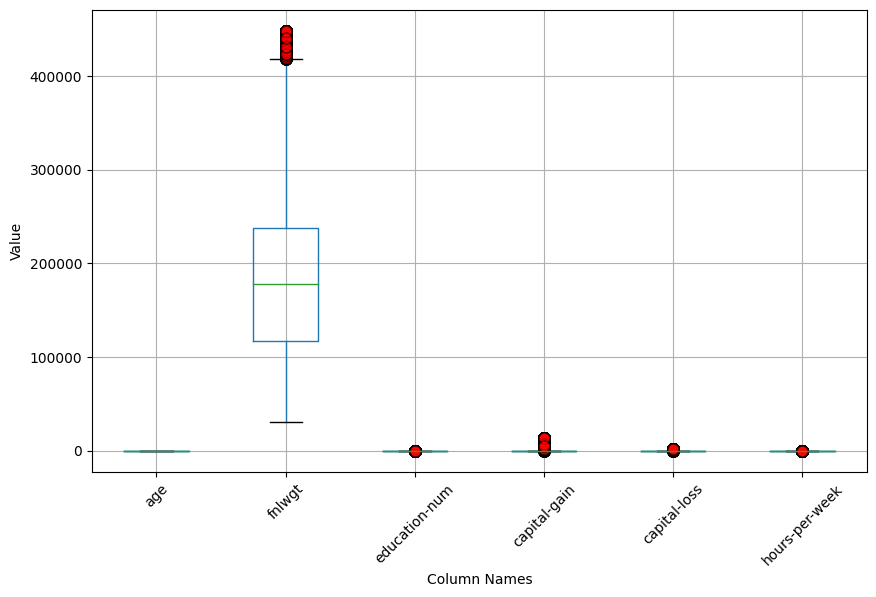

In [94]:
#getting Box plot to Winsorizerd Numrical Columns
numerical_column_names = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Perform winsorization on numerical columns
winsorized_data = dataSet.copy()  # Create a copy of  DataFrame

for col in numerical_column_names:
    winsorized_data[col] = winsorize(dataSet[col], limits=[0.02, 0.02])

dataSet= winsorized_data

# Visualize the boxplots of winsorized data

plt.figure(figsize=(10, 6))
winsorized_data[numerical_column_names].boxplot(flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none',alpha=0.7 ))

plt.xlabel('Column Names')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

Class balancing

In [95]:
high_incomes = dataSet[dataSet['income'] == '>50K']
low_incomes = dataSet[dataSet['income'] == '<=50K']

# Displaying summary for statistics
print("High Incomes Summary:")
print(high_incomes['capital-gain'].describe())

print("\nLow Incomes Summary:")
print(low_incomes['capital-gain'].describe())

High Incomes Summary:
count    11535.000000
mean      2093.111227
std       4398.534725
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      14084.000000
Name: capital-gain, dtype: float64

Low Incomes Summary:
count    36038.000000
mean       143.273822
std        777.558078
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      14084.000000
Name: capital-gain, dtype: float64


In [96]:

desired_size = len(high_incomes)

# Resampling the Low Incomes  to match the size of the High Incomes
new_low_incomes = low_incomes.sample(n=desired_size, replace=True, random_state=42)

#Merge the realigned low-incomes  with the high-incomes
balanced_dataset = pd.concat([new_low_incomes, high_incomes], axis=0)

#  Mixing balanced dataset
balanced_dataset = balanced_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Displaying summary of balanced dataset
print("Balanced Dataset Summary:")
print(balanced_dataset['capital-gain'].describe())

Balanced Dataset Summary:
count    23070.000000
mean      1116.095405
std       3307.369649
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      14084.000000
Name: capital-gain, dtype: float64


In [97]:
high_incomes = balanced_dataset[balanced_dataset['income'] == '>50K']
low_incomes = balanced_dataset[balanced_dataset['income'] == '<=50K']

# Display summary
print("High Incomes Summary:")
print(high_incomes['capital-gain'].describe())

print("\nLow Incomes Summary:")
print(low_incomes['capital-gain'].describe())

High Incomes Summary:
count    11535.000000
mean      2093.111227
std       4398.534725
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      14084.000000
Name: capital-gain, dtype: float64

Low Incomes Summary:
count    11535.000000
mean       139.079584
std        788.633818
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      14084.000000
Name: capital-gain, dtype: float64


Encoding

In [98]:
labelEncoder = LabelEncoder()
LabelEncoded_dataSet = balanced_dataset.copy()
encoding_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country','income']
for col in encoding_columns:
    LabelEncoded_dataSet[col] = labelEncoder.fit_transform(balanced_dataset[col])

# Call the encoded DataFrame
LabelEncoded_dataSet

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,42,0,132125,13,2,3,0,4,1,0,0,52,37,1
1,20,3,305446,9,4,7,3,4,1,0,0,30,37,0
2,39,3,30824,10,2,11,0,4,1,0,0,40,28,1
3,51,3,305673,11,2,2,0,4,1,0,0,40,1,1
4,40,3,220460,9,4,2,1,4,1,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23065,40,1,218995,10,2,3,0,4,1,0,0,42,37,1
23066,67,4,127605,14,2,9,0,4,1,14084,0,60,20,1
23067,19,8,131982,10,4,14,3,4,1,0,0,40,37,0
23068,19,8,119234,10,4,14,2,4,0,0,0,15,37,0


Scaling

In [99]:
import pandas as pd

scaler = StandardScaler()
scaledData = scaler.fit_transform(LabelEncoded_dataSet)
scaledData = pd.DataFrame(scaledData, columns=LabelEncoded_dataSet.columns)
scaledData

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.119397,-2.244127,-0.578739,0.952368,-0.320536,-0.798993,-0.733770,0.364961,0.615463,-0.337464,-0.261977,0.890734,0.247778,1.0
1,-1.634542,-0.172473,1.209154,-0.641215,1.159158,0.156295,1.111520,0.364961,0.615463,-0.337464,-0.261977,-1.068796,0.247778,-1.0
2,-0.119777,-0.172473,-1.623709,-0.242819,-0.320536,1.111584,-0.733770,0.364961,0.615463,-0.337464,-0.261977,-0.178101,-1.274074,1.0
3,0.836917,-0.172473,1.211495,0.155576,-0.320536,-1.037815,-0.733770,0.364961,0.615463,-0.337464,-0.261977,-0.178101,-5.839633,1.0
4,-0.040052,-0.172473,0.332481,-0.641215,1.159158,-1.037815,-0.118673,0.364961,0.615463,-0.337464,-0.261977,-0.178101,-5.839633,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23065,-0.040052,-1.553576,0.317369,-0.242819,-0.320536,-0.798993,-0.733770,0.364961,0.615463,-0.337464,-0.261977,0.000039,0.247778,1.0
23066,2.112509,0.518078,-0.625365,1.350764,-0.320536,0.633940,-0.733770,0.364961,0.615463,3.920997,-0.261977,1.603291,-2.626833,1.0
23067,-1.714267,3.280283,-0.580214,-0.242819,1.159158,1.828051,1.111520,0.364961,0.615463,-0.337464,-0.261977,-0.178101,0.247778,-1.0
23068,-1.714267,3.280283,-0.711716,-0.242819,1.159158,1.828051,0.496423,0.364961,-1.624792,-0.337464,-0.261977,-2.404840,0.247778,-1.0


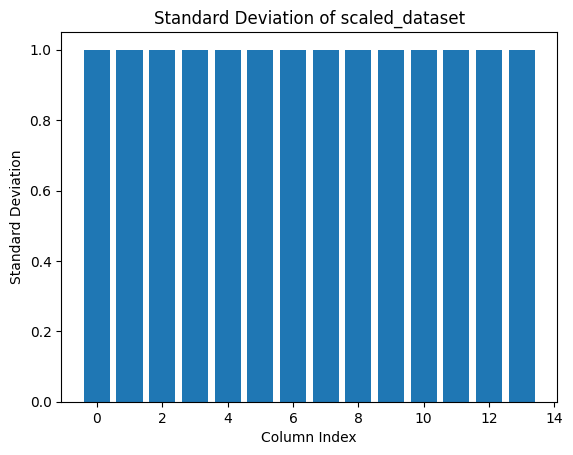

In [100]:
# Calculating the standard deviation of columns
std_deviation = scaledData.std()

# Ploting
plt.bar(range(len(std_deviation)), std_deviation)
plt.title("Standard Deviation of scaled_dataset")
plt.xlabel("Column Index")
plt.ylabel("Standard Deviation")
plt.show()

Feature Selection

<Axes: >

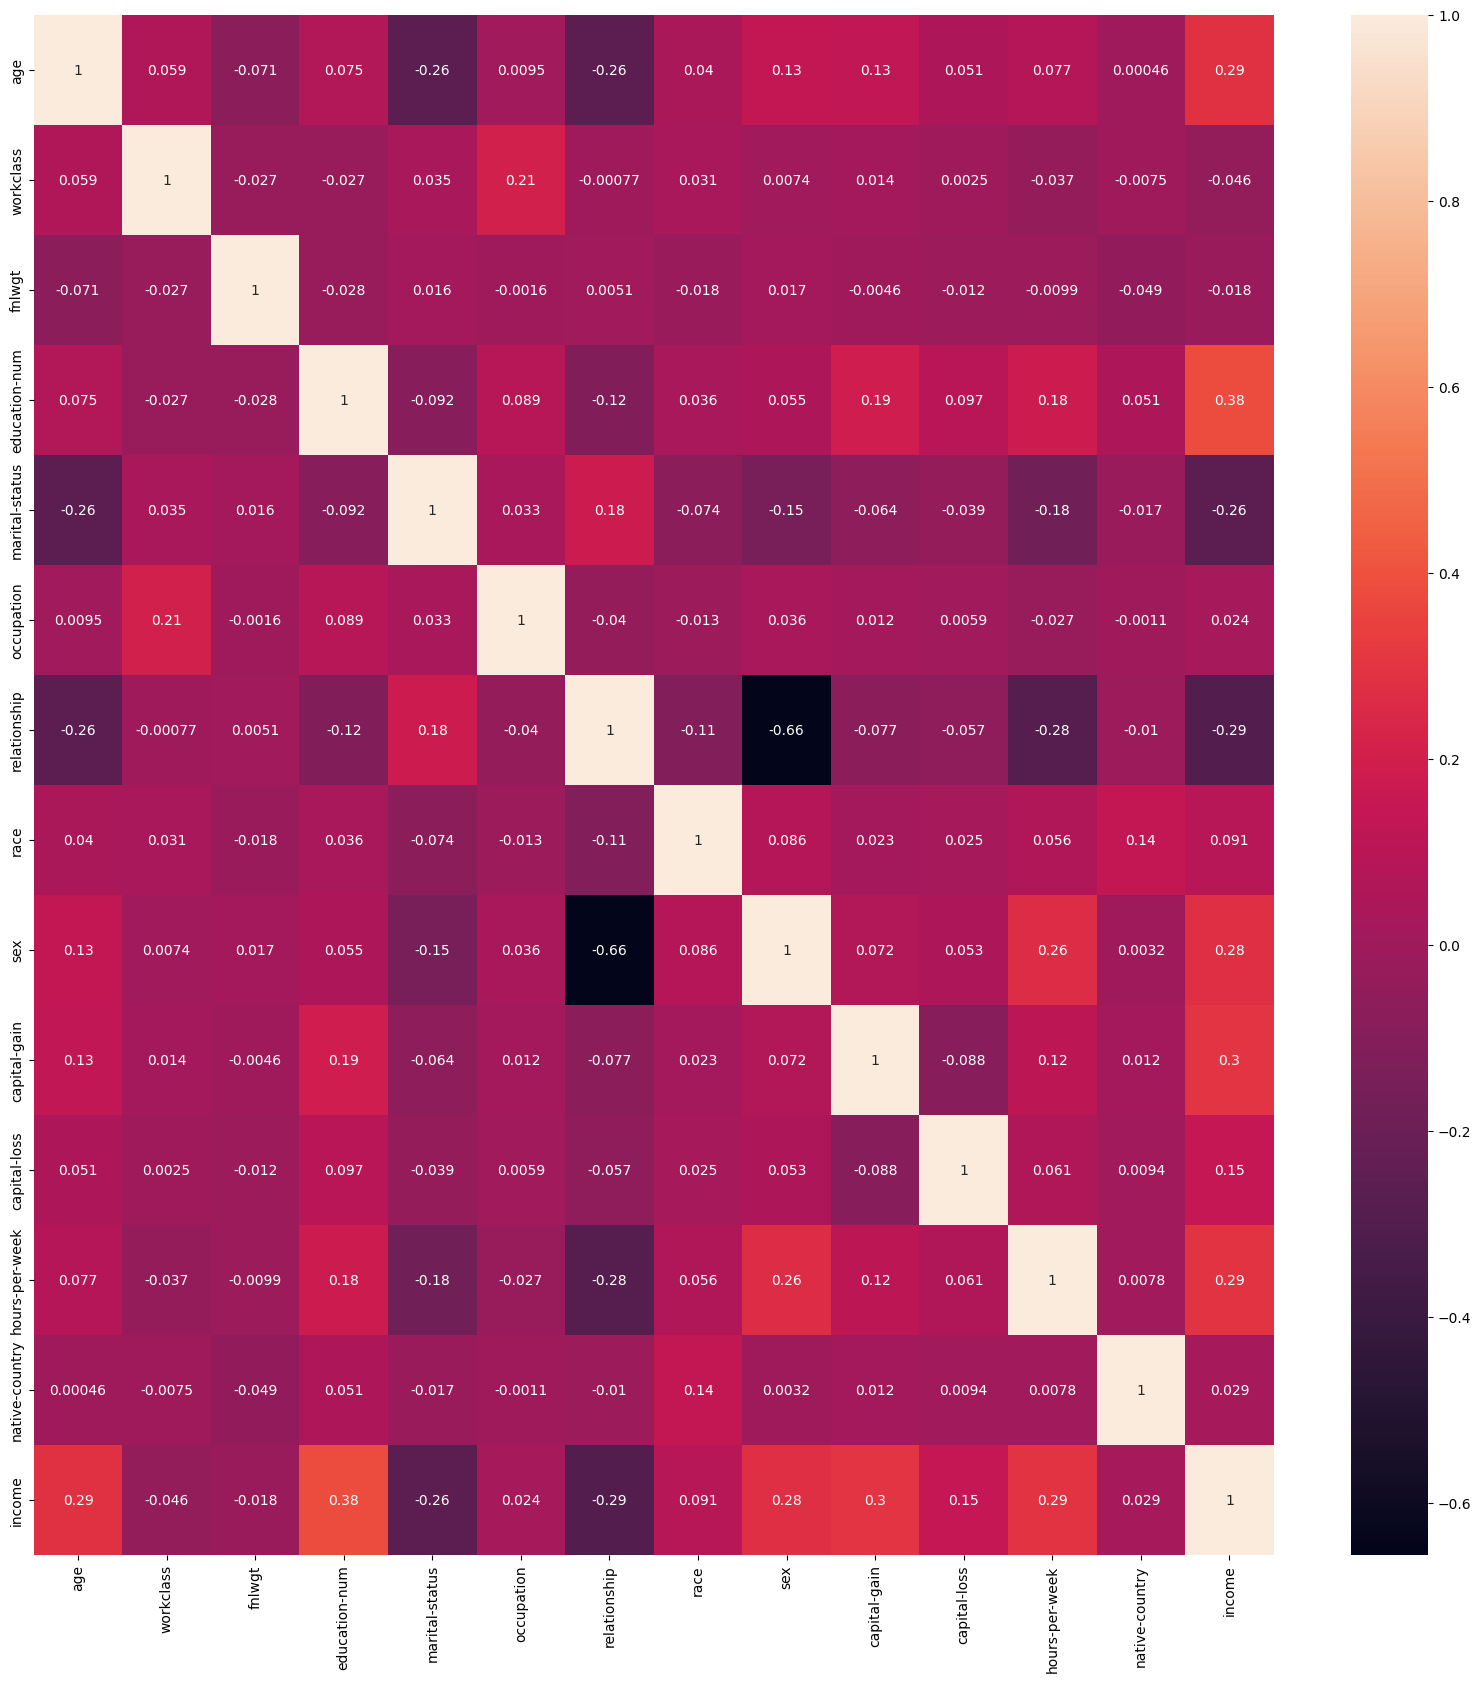

In [101]:
# Heatmap of the correlation matrix.
plt.figure(figsize=(20,20))
sns.heatmap(scaledData.corr(),annot=True)

In [102]:
corr_value = scaledData.corr()
corr_target = corr_value['income']
sorted_corr_value = corr_target.sort_values(ascending=False)

print("absolute correlation with the target variable:")
print(sorted_corr_value)

absolute correlation with the target variable:
income            1.000000
education-num     0.382595
capital-gain      0.295412
hours-per-week    0.291509
age               0.287547
sex               0.278308
capital-loss      0.145035
race              0.091147
native-country    0.028564
occupation        0.023603
fnlwgt           -0.017537
workclass        -0.046097
marital-status   -0.259219
relationship     -0.293737
Name: income, dtype: float64


In [103]:
scaledData = scaledData.drop(['race','occupation','fnlwgt','native-country','workclass'], axis=1)
scaledData

,age,education-num,marital-status,relationship,sex,capital-gain,capital-loss,hours-per-week,income
0,0.119397,0.952368,-0.320536,-0.733770,0.615463,-0.337464,-0.261977,0.890734,1.0
1,-1.634542,-0.641215,1.159158,1.111520,0.615463,-0.337464,-0.261977,-1.068796,-1.0
2,-0.119777,-0.242819,-0.320536,-0.733770,0.615463,-0.337464,-0.261977,-0.178101,1.0
3,0.836917,0.155576,-0.320536,-0.733770,0.615463,-0.337464,-0.261977,-0.178101,1.0
4,-0.040052,-0.641215,1.159158,-0.118673,0.615463,-0.337464,-0.261977,-0.178101,-1.0
...,...,...,...,...,...,...,...,...,...
23065,-0.040052,-0.242819,-0.320536,-0.733770,0.615463,-0.337464,-0.261977,0.000039,1.0
23066,2.112509,1.350764,-0.320536,-0.733770,0.615463,3.920997,-0.261977,1.603291,1.0
23067,-1.714267,-0.242819,1.159158,1.111520,0.615463,-0.337464,-0.261977,-0.178101,-1.0
23068,-1.714267,-0.242819,1.159158,0.496423,-1.624792,-0.337464,-0.261977,-2.404840,-1.0


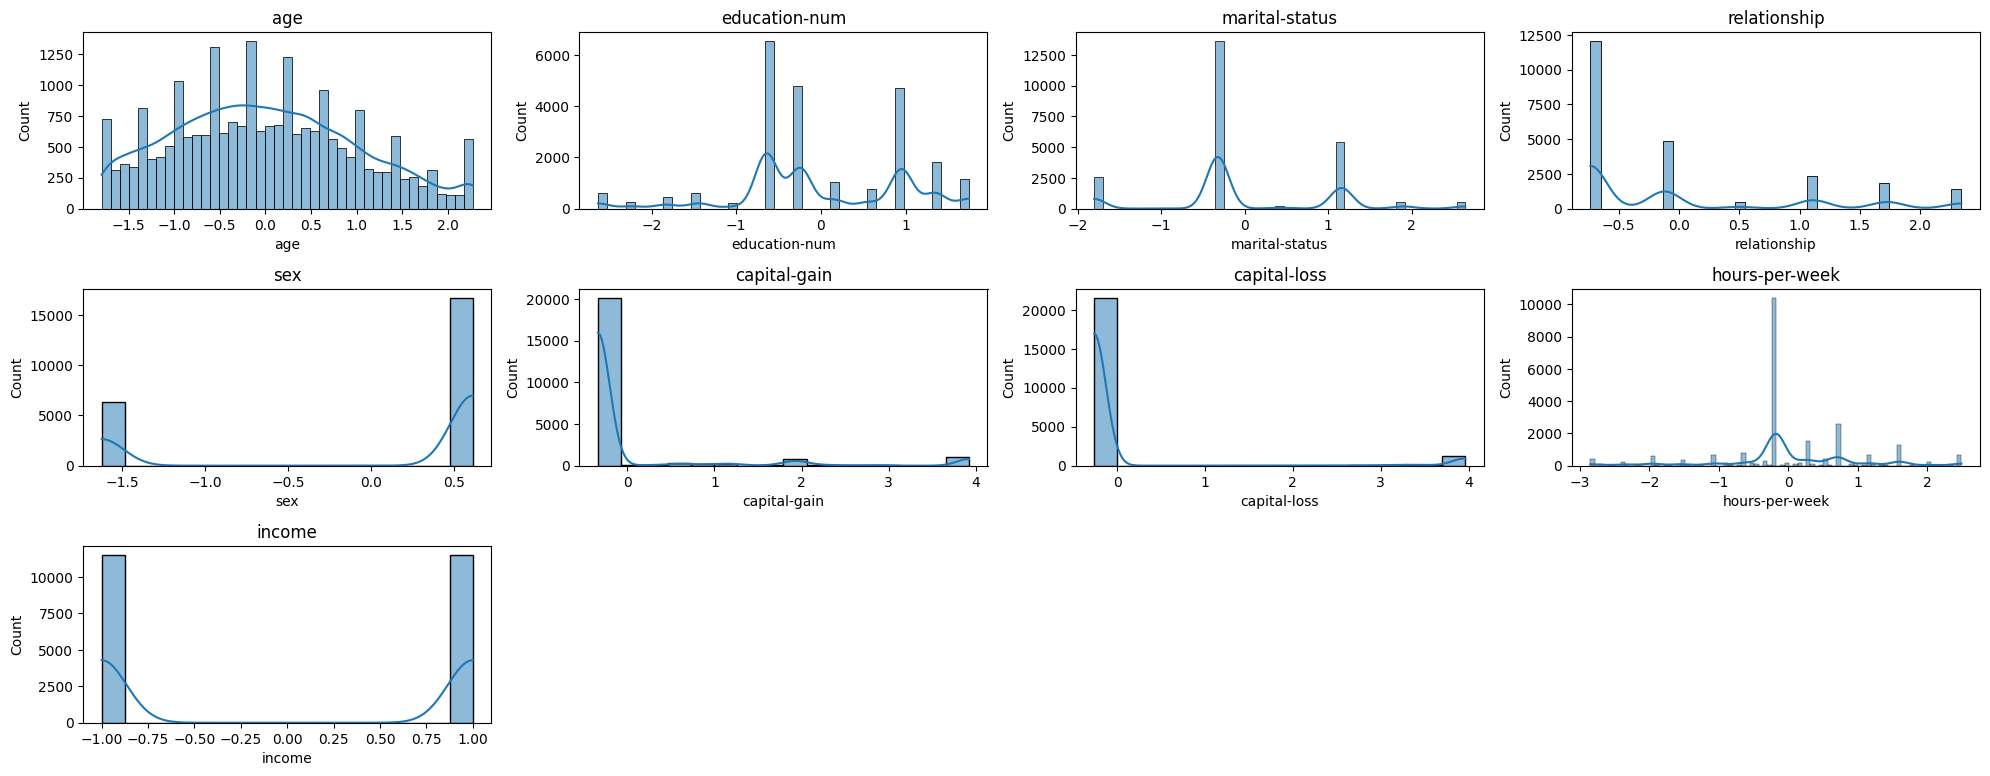

In [104]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(scaledData.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(scaledData[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

Splilting the Dataset

In [105]:
final_DataSet = scaledData


In [106]:
y = final_DataSet['income']
X = final_DataSet[['age', 'education-num', 'marital-status', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week']]
X.head()

,age,education-num,marital-status,relationship,sex,capital-gain,capital-loss,hours-per-week
0,0.119397,0.952368,-0.320536,-0.733770,0.615463,-0.337464,-0.261977,0.890734
1,-1.634542,-0.641215,1.159158,1.111520,0.615463,-0.337464,-0.261977,-1.068796
2,-0.119777,-0.242819,-0.320536,-0.733770,0.615463,-0.337464,-0.261977,-0.178101
3,0.836917,0.155576,-0.320536,-0.733770,0.615463,-0.337464,-0.261977,-0.178101
4,-0.040052,-0.641215,1.159158,-0.118673,0.615463,-0.337464,-0.261977,-0.178101


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((18456, 8), (4614, 8))

In [108]:
X_train.head()

,age,education-num,marital-status,relationship,sex,capital-gain,capital-loss,hours-per-week
14319,-0.119777,-0.641215,-0.320536,-0.733770,0.615463,-0.337464,-0.261977,-0.178101
9140,1.155815,0.553972,-0.320536,-0.733770,0.615463,-0.337464,-0.261977,-1.514144
11655,0.518019,0.952368,1.159158,-0.118673,0.615463,3.920997,-0.261977,-0.356240
2935,-0.040052,-0.242819,-0.320536,2.341714,-1.624792,1.987092,-0.261977,-0.178101
7731,-0.119777,0.155576,-0.320536,-0.733770,0.615463,-0.337464,-0.261977,-0.178101


In [109]:
y_train.head()

14319    1.0
9140    -1.0
11655    1.0
2935     1.0
7731    -1.0
Name: income, dtype: float64

Random forst classifier

In [110]:
# perform the parameter Tuning
param_grid = {
    'n_estimators': [80, 100,120 ],
    'max_depth': [None,8],
    'min_samples_split': [2, 8,10],
    'min_samples_leaf': [3,4,5]
}

rand= RandomForestClassifier(random_state=42)
gridSearch = GridSearchCV(estimator=rand, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
gridSearch.fit(X_train, y_train)

print("Best Parameters:", gridSearch.best_params_)
print("Best Score:", gridSearch.best_score_)

y_pred = gridSearch.best_estimator_.predict(X_test)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 120}
Best Score: 0.8304074555700044


In [111]:
#Evaluation of the best model obtained from Grid Search

print("Random Forest Classifier:")
print("Accuracy is :", accuracy_score(y_test, y_pred))
print("Classification Summary:")
print(classification_report(y_test, y_pred))

gridSearch.score(X_train, y_train)
print("Random Forest Classifier:")
print("Training Accuracy:",gridSearch.score(X_train, y_train))
print("Testing Accuracy:",gridSearch.score(X_test, y_test))

Random Forest Classifier:
Accuracy is : 0.8270481144343304
Classification Summary:
              precision    recall  f1-score   support

        -1.0       0.87      0.77      0.82      2305
         1.0       0.80      0.88      0.84      2309

    accuracy                           0.83      4614
   macro avg       0.83      0.83      0.83      4614
weighted avg       0.83      0.83      0.83      4614

Random Forest Classifier:
Training Accuracy: 0.8526766363242306
Testing Accuracy: 0.8270481144343304


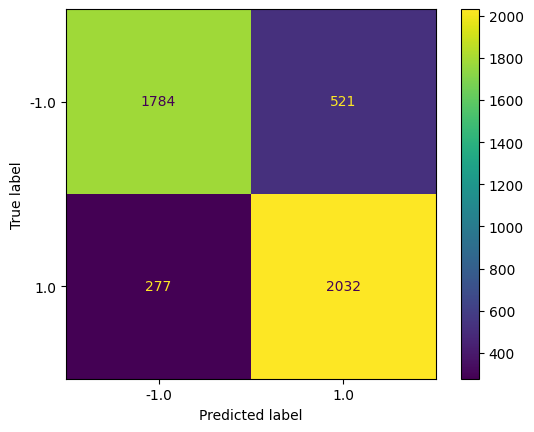

In [112]:
confusionMatrix = confusion_matrix(y_test, y_pred, labels=gridSearch.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=gridSearch.classes_)

display.plot()
plt.show()

Random Prediction: ROC AUC=0.500
Random Forest: ROC AUC=0.908


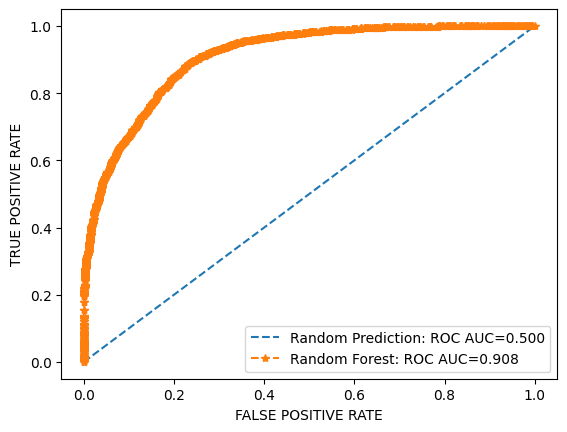

In [113]:
Random_Forest_probabilities = gridSearch.predict_proba(X_test)
Random_Forest_prob_New = Random_Forest_probabilities[:, 1]

ns_probability = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probability)
Random_Forest_auc = roc_auc_score(y_test, Random_Forest_prob_New)

print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (Random_Forest_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probability)
Random_Forest_fpr, Random_Forest_tpr, _ = roc_curve(y_test, Random_Forest_prob_New)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(Random_Forest_fpr, Random_Forest_tpr, linestyle='--',marker='*',label='Random Forest: ROC AUC=%.3f' % (Random_Forest_auc))
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend()
plt.show()

Naive bayes

In [114]:
# Adjust this nedded value
model = GaussianNB()

powerTransformer = PowerTransformer()
xTransformed = powerTransformer.fit_transform(X)

# Split part
X_train, X_test, y_train, y_test = train_test_split(xTransformed, y, test_size=0.2, random_state=42)

# Train the model using the training sets
gnb = model.fit(X_train, y_train)

gnbPredictions = gnb.predict(X_test)

# Evaluate part
print("Naïve Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, gnbPredictions))
print("Classification Report:")
print(classification_report(y_test, gnbPredictions))
print("Naïve Bayes Classifier:")
print("Training Accuracy is:",model.score(X_train, y_train))
print("Testing Accuracy is:",model.score(X_test, y_test))

Naïve Bayes Classifier:
Accuracy: 0.7648461205028175
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.78      0.75      0.76      2305
         1.0       0.76      0.78      0.77      2309

    accuracy                           0.76      4614
   macro avg       0.77      0.76      0.76      4614
weighted avg       0.77      0.76      0.76      4614

Naïve Bayes Classifier:
Training Accuracy is: 0.7834308625921109
Testing Accuracy is: 0.7648461205028175


Random Prediction: ROC AUC=0.500
Naïve Bayes: ROC AUC=0.840


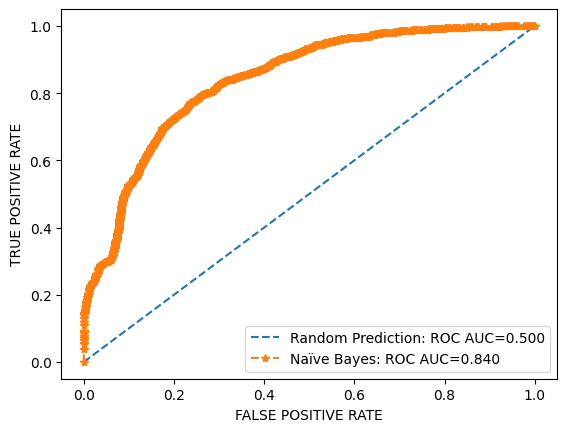

In [115]:
# Predict probabilities
Naïve_Bayes_probability = model.predict_proba(X_test)
Naïve_Bayes_prob_new = Naïve_Bayes_probability[:, 1]

ns_probs = [0 for _ in range(len(y_test))]

ns_auc = roc_auc_score(y_test, ns_probs)
Naïve_Bayes_auc = roc_auc_score(y_test, Naïve_Bayes_prob_new)

print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Naïve Bayes: ROC AUC=%.3f' % (Naïve_Bayes_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
Naïve_Bayes_fpr, Naïve_Bayes_tpr, _ = roc_curve(y_test, Naïve_Bayes_prob_new)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(Naïve_Bayes_fpr, Naïve_Bayes_tpr, linestyle='--',marker='*',label='Naïve Bayes: ROC AUC=%.3f' % (Naïve_Bayes_auc))
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend()
plt.show()

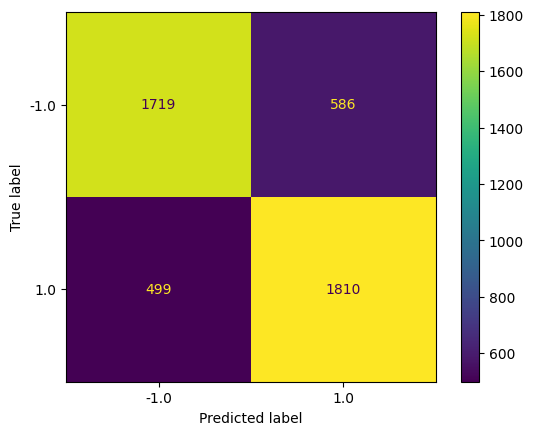

In [116]:
confusionMatrix = confusion_matrix(y_test, gnbPredictions, labels=gnb.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=gnb.classes_)

display.plot()
plt.show()

comparison of random forest classifier and naive bayes classifier


In [117]:
# Accuracy scores
naive_bayes_accuracy = accuracy_score(y_test, gnbPredictions)
random_forest_accuracy = accuracy_score(y_test, y_pred)

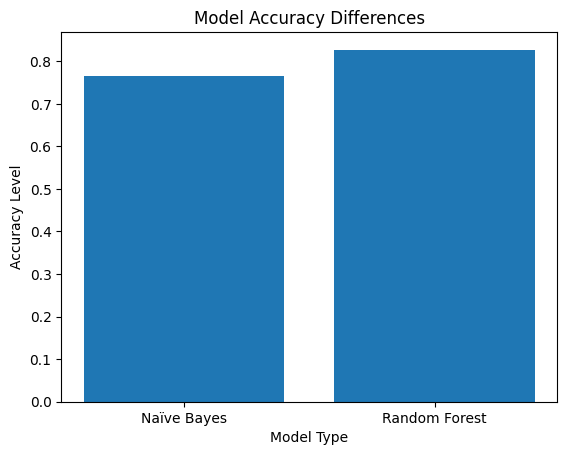

In [118]:
# Create a figure and axis
fig, ax = plt.subplots()

models = ['Naïve Bayes', 'Random Forest']
accuracy = [naive_bayes_accuracy, random_forest_accuracy]

ax.bar(models, accuracy)

ax.set_title('Model Accuracy Differences')
ax.set_xlabel('Model Type')
ax.set_ylabel('Accuracy Level')

# Show the plot
plt.show()

In [119]:
print("The best model:")
if naive_bayes_accuracy > random_forest_accuracy:
    print("Naïve Bayes classifier")
elif naive_bayes_accuracy < random_forest_accuracy:
    print("Random Forest classifier")
else:
    print("Both models have the equal accuracy.")

The best model:
Random Forest classifier
